# Project: Real Estate Price Predication

## Created By: Muskan Garg

## Guided By: Mr. Shaurya Sharma

### Studying in University: GLA UNIVERSITY, Mathura

### Course: B-Tech (Hons) in Computer Science and Engineering


## Importing the libraries


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score ,mean_squared_error ,mean_absolute_error

## Problem Statement
### You have been given a dataset that describe the functionality of houses. Now based on the given features, you have to predict the house price.

## Defining the DataFrame

In [2]:
df=pd.read_csv("Housing.csv")

# EDA -Exploratory Data Analysis

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [6]:
df.shape[0] # for calculating number of rows in a database

545

In [7]:
df.shape[1] # for calculating number of columns in a database

13

In [8]:
df.columns # to get the name of all columns in a list

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
df.info() # to get more informationn about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
df.dtypes # to check datatypes of all coulmns

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [11]:
df.nunique() # finding number of unique values in each column

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [12]:
df.isnull().sum() # for calculating total null value in each column

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [13]:
df.isnull().sum().sum() # to calculate total number of null values in whole data set

0

<pre>
price     strength
10           2
100          3
1000         4

we want like this
</pre>

In [14]:
df.mainroad.unique() # check unique value

array(['yes', 'no'], dtype=object)

In [15]:
df.mainroad.value_counts() # to count number of yes and no

yes    468
no      77
Name: mainroad, dtype: int64

In [16]:
# yes -> 1
# No -> 0
newdf=df.copy()

In [17]:
# For mainroad
# For counting number of yes and no
df.mainroad.replace(['yes','no'],[1,0]).value_counts() #for replacing (yes: 1) and (no: 0)

1    468
0     77
Name: mainroad, dtype: int64

In [18]:
df.mainroad.replace(['yes','no'],[1,0],inplace=True) #replace (yes by 1) and (no by 0)

In [19]:
df.mainroad.unique()

array([1, 0], dtype=int64)

In [20]:
df.mainroad.value_counts()

1    468
0     77
Name: mainroad, dtype: int64

In [21]:
# For Guestroom
# For counting number of yes and no
df.guestroom.replace(['yes','no'],[1,0]).value_counts() #for replacing (yes: 1) and (no: 0)

0    448
1     97
Name: guestroom, dtype: int64

In [22]:
df.guestroom.replace(['yes','no'],[1,0],inplace=True)

In [23]:
df.guestroom.unique()

array([0, 1], dtype=int64)

In [24]:
df.guestroom.value_counts()

0    448
1     97
Name: guestroom, dtype: int64

In [25]:
# For Basement
df.basement.replace(['yes','no'],[1,0],inplace=True)


In [26]:
# Replacing yes by 1 and no by 0
lst=['hotwaterheating','airconditioning','prefarea']
for i in lst:
    df[i].replace(['yes','no'],[1,0],inplace=True)

In [27]:
df.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [28]:
# Replacing furnished  by 2 , semi-furnished by 1 and unfurnished by 0
df.furnishingstatus.replace(['furnished','semi-furnished','unfurnished'],[2,1,0],inplace=True)

In [29]:
df.head() # now all data is in numerical value

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


## Observation
<pre>
1.Data Strength - 545
2.Number of Random Variable -13
3.Dependent Variable -1 and Independent variable -12
4.None of the columns contains NULL Values
5.Columns - price, area, bedrooms, bathrooms, stories, parking has numerical values
6.Columns - mainroad,guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishinstatus has object values
</pre>

# Manipulation
Changed the categorical values into numerical values of columns containg object values (mainroad , guestroom ,basement , hotwaterheating, airconditioning, prefarea, furnishingstatus)

In [30]:
df.dtypes # now we see all data types into int data type

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

In [31]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


<AxesSubplot:>

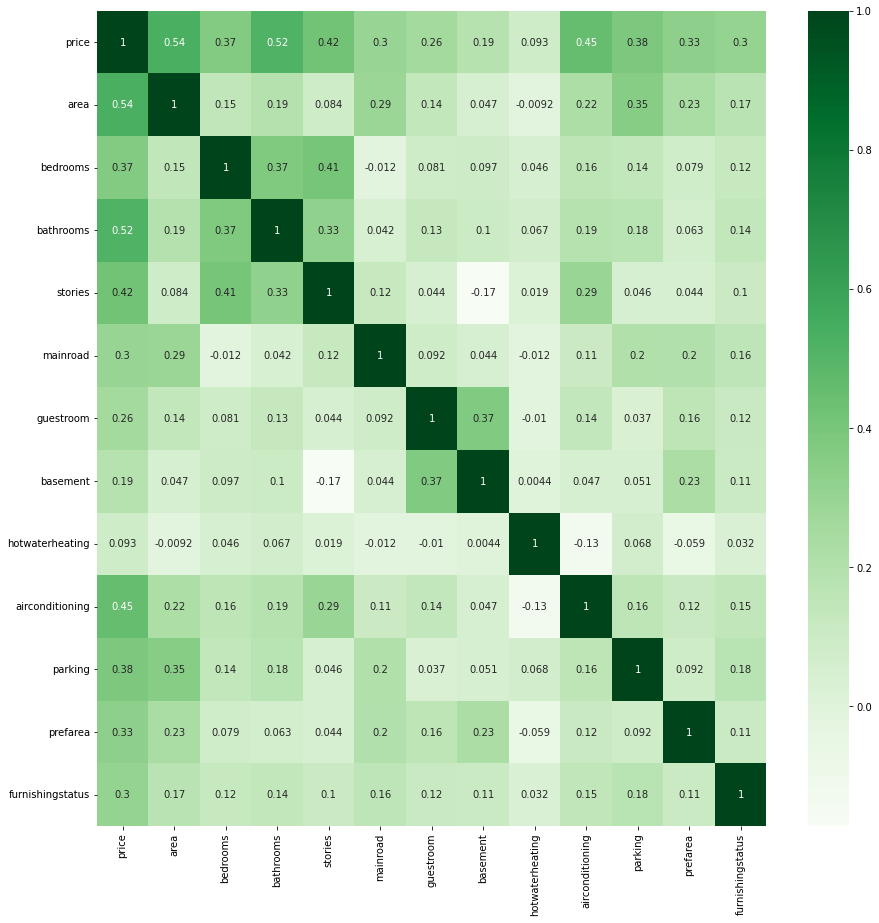

In [32]:
plt.figure(figsize=(15,15))
# Realtion between Independent varible and dependent variable 
# We want to see correlation between them
sns.heatmap(df.corr(),annot=True, cmap='Greens')

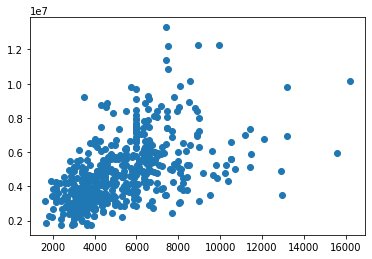

In [33]:
plt.scatter(df.area,df.price) # area effect mostly the price

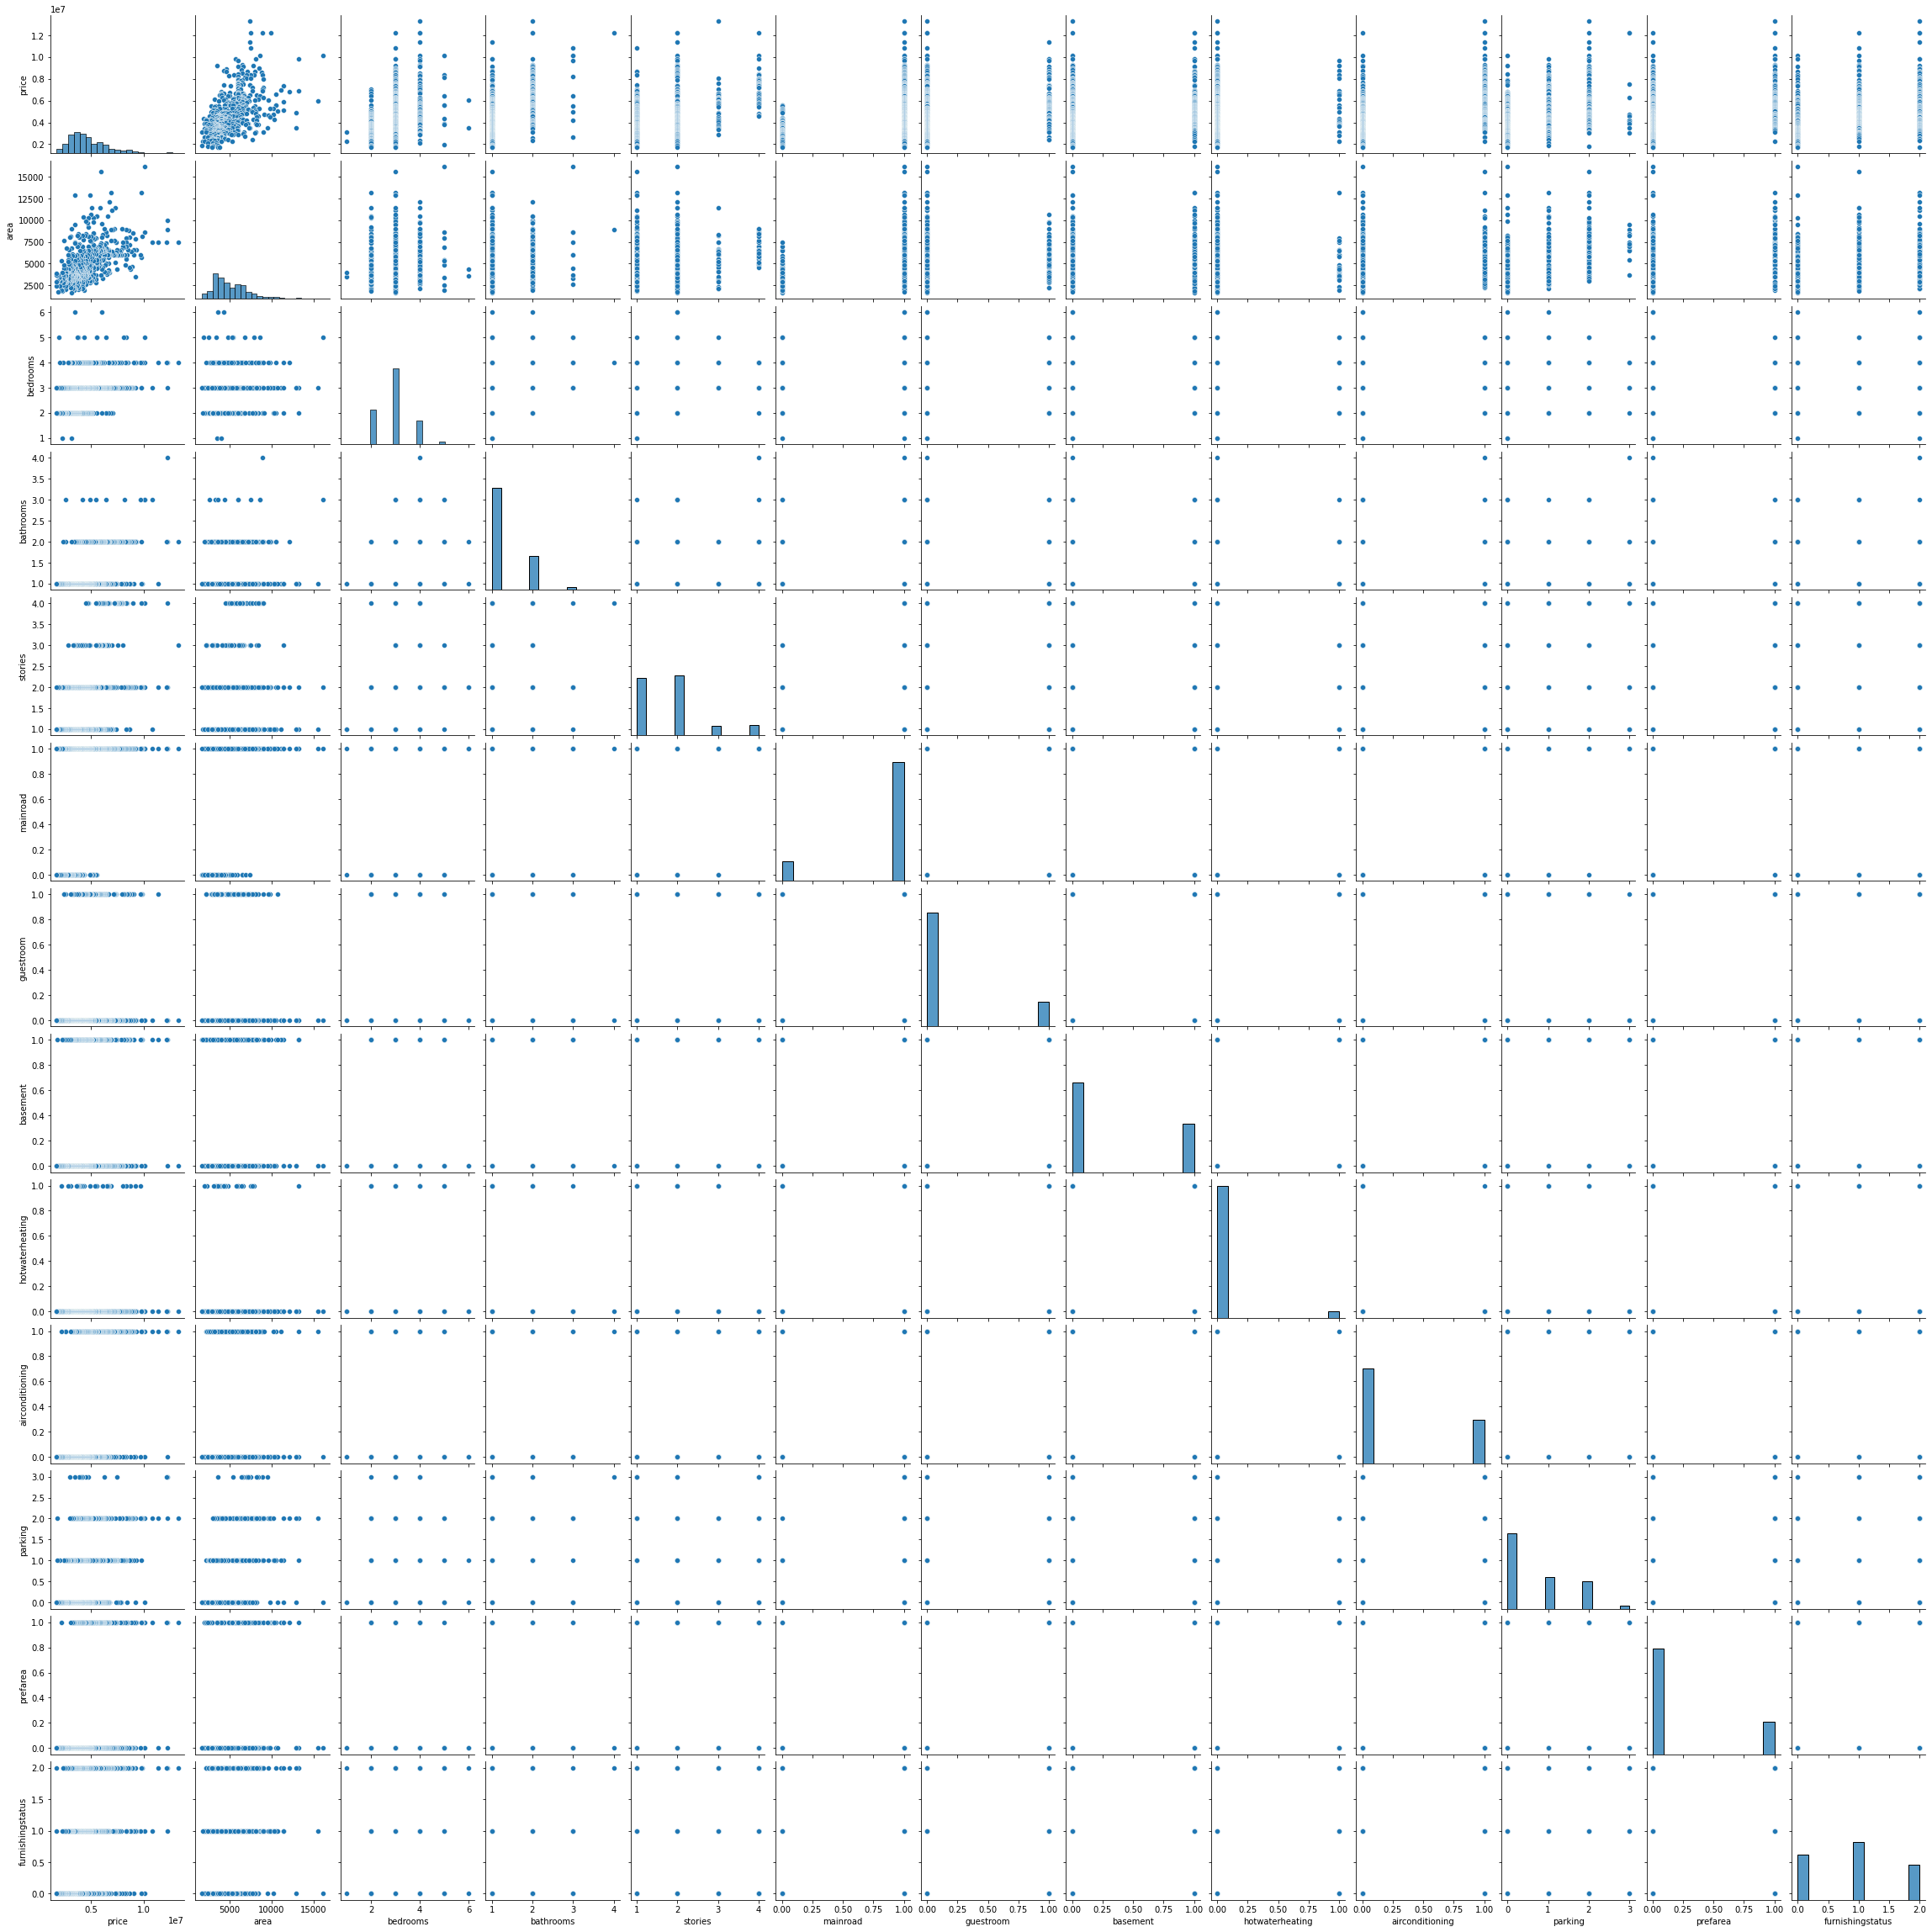

In [71]:
sns.pairplot(df) # give correlation between them

<AxesSubplot:>

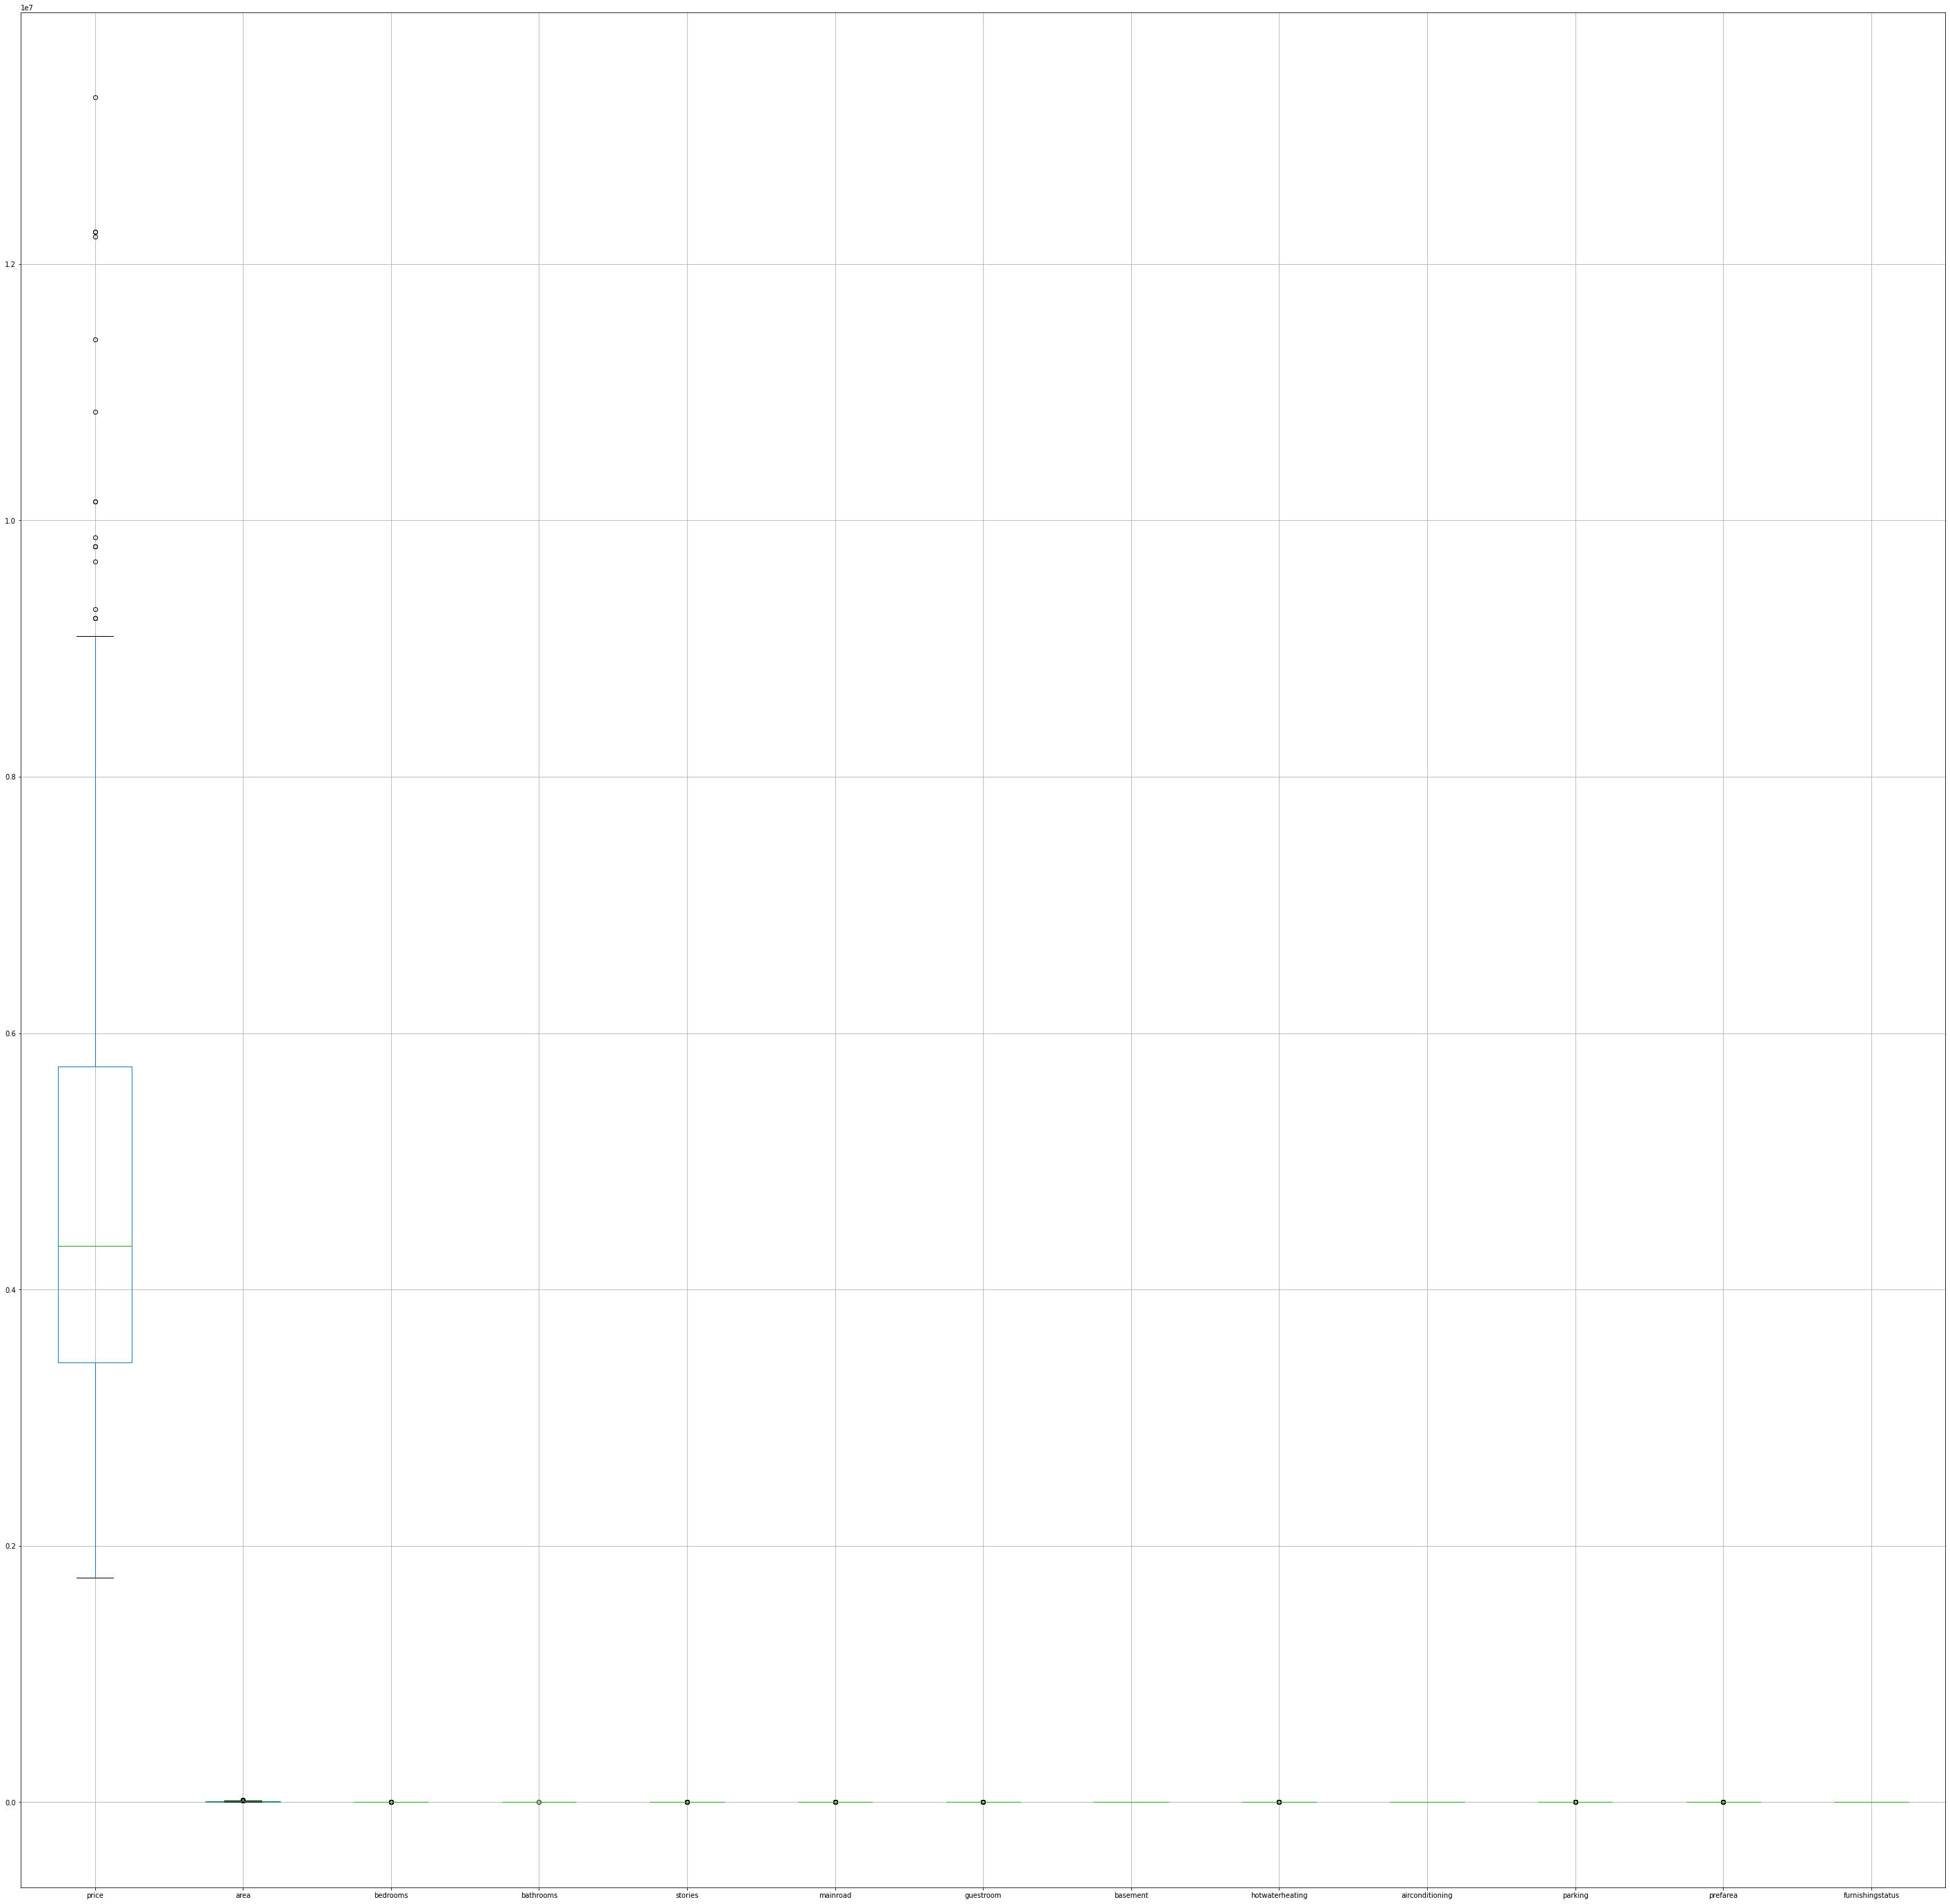

In [76]:
# best fpr check outliers
plt.figure(figsize=(50,50))
df.boxplot()

<AxesSubplot:>

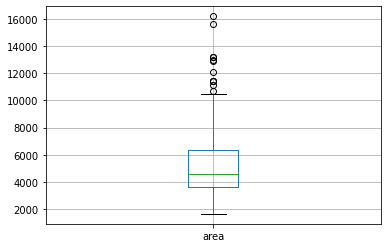

In [77]:
df[['area']].boxplot() 

<AxesSubplot:>

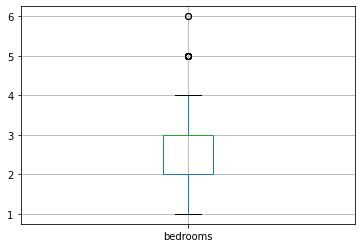

In [37]:
df[['bedrooms']].boxplot()

In [38]:
# How many values are there where bedrooms is more than 4
len(df.bedrooms[df.bedrooms>4])

12

<AxesSubplot:>

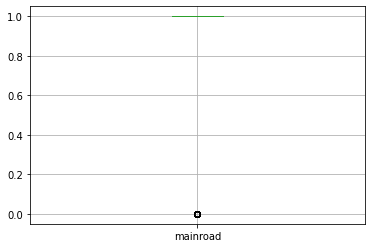

In [39]:
df[['mainroad']].boxplot()

In [40]:
len(df.mainroad[df.mainroad==0])   # here 0 is outlier


77

<AxesSubplot:xlabel='price', ylabel='Count'>

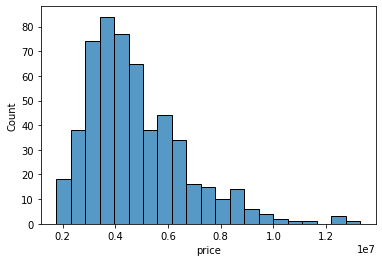

In [41]:
# Where majority of data lies which are shown by histplot
sns.histplot(df.price)

In [42]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


<AxesSubplot:>

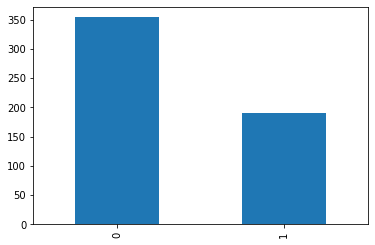

In [43]:
df.basement.value_counts().plot.bar()

In [44]:
# What is the price of house where bedrooms are 4 and bathroom is 2
df.loc[df.bedrooms==4,['price','bedrooms','bathrooms']][df.bathrooms==2]

C:\Users\DELL\AppData\Local\Temp\ipykernel_680\1536918871.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[df.bedrooms==4,['price','bedrooms','bathrooms']][df.bathrooms==2]


,price,bedrooms,bathrooms
0,13300000,4,2
3,12215000,4,2
12,9310000,4,2
13,9240000,4,2
16,9100000,4,2
25,8540000,4,2
29,8400000,4,2
32,8295000,4,2
37,7980000,4,2
39,7910000,4,2


## Observation
<pre>
 According to given conditions:
 Maximum price of house = 13300000
 Minimum price of house = 2380000
 </pre>

# Splitting the Dataset

In [45]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2


In [46]:
x=df.iloc[0:,1:]  #other way df[df.columns[1:]] , other way df.drop('price',axis=1)
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,2


In [47]:
y=df.price
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [48]:
df.price.ndim    # to check the dimension

1

In [49]:
x_train, x_test , y_train , y_test= train_test_split(x,y,test_size=0.2,random_state=42)
# want to same pattern of randomness we put random_state=1 None always give differnt random data set when run

In [50]:
len(x_train)

436

In [51]:
len(x_test)

109

In [52]:
len(y_train)

436

In [53]:
len(y_test)

109

# Choosing the model

In [54]:
model=LinearRegression()

# Fitting/Training the model

In [55]:
model.fit(x_train,y_train)

LinearRegression()

### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [56]:
#intercept Value(cost function)
model.intercept_

-127711.16739244293

In [57]:
#Coefficient Value
model.coef_

array([2.35848772e+02, 7.85744924e+04, 1.09711727e+06, 4.06223164e+05,
       3.66824192e+05, 2.33146766e+05, 3.93159779e+05, 6.87881311e+05,
       7.85550579e+05, 2.25756514e+05, 6.29901661e+05, 2.10397118e+05])

# Prediction

In [58]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [59]:
pred_y=model.predict(x_test)

In [60]:
pred_y

array([5203691.70963178, 7257004.02115476, 3062828.59668171,
       4559591.65374424, 3332932.30559782, 3563080.67918997,
       5645466.31219972, 6413979.66873635, 2755831.54819   ,
       2668938.66075228, 9570600.29915353, 2827431.50860062,
       3195686.2583409 , 3352263.99438471, 3713879.49996132,
       5301088.24435749, 2987920.2666968 , 4810799.8212371 ,
       4383031.7048993 , 3525092.18938646, 5796259.50068013,
       5840000.70299301, 2760214.608641  , 4762590.14920608,
       5204755.73895206, 7515542.71619025, 3254681.68956382,
       5236164.45964444, 8178523.16820284, 3434166.15675649,
       6443921.58767581, 3346004.77919184, 6742324.74004133,
       4154936.84088665, 3589152.47491252, 5788125.92515323,
       4768370.18154077, 4391684.04193172, 3217657.04549935,
       4638196.61928878, 4522160.27786714, 3541284.06127245,
       7238136.11941171, 4021515.68926614, 3701978.76822757,
       4298879.55563098, 6705004.0206061 , 3993466.52296896,
       3798185.05328059,

In [61]:
newdf=pd.DataFrame({"Actual Value":y_test,"predicted Value":pred_y})

In [62]:
newdf

,Actual Value,predicted Value
316,4060000,5.203692e+06
77,6650000,7.257004e+06
360,3710000,3.062829e+06
90,6440000,4.559592e+06
493,2800000,3.332932e+06
...,...,...
15,9100000,4.933137e+06
357,3773000,4.377133e+06
39,7910000,7.009335e+06
54,7350000,6.351461e+06


Text(0.5, 1.0, 'Actual V/S predicted')

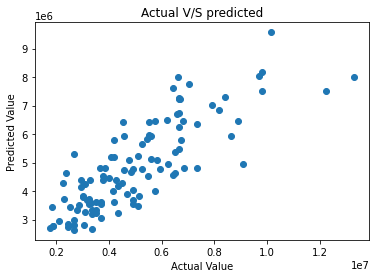

In [63]:
# Relationship between actual and predicted value
plt.scatter(newdf['Actual Value'],newdf['predicted Value'])
plt.xlabel("Actual Value")
plt.ylabel('Predicted Value')
plt.title('Actual V/S predicted')

In [64]:
# find strength
newdf.corr()

,Actual Value,predicted Value
Actual Value,1.00000,0.81839
predicted Value,0.81839,1.00000


<AxesSubplot:>

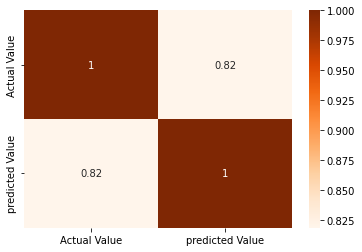

In [65]:
sns.heatmap(newdf.corr(),annot=True ,cmap='Oranges')

<pre>
1 - perfect
0.99 -0.79 - Strong
0.78 -0.5 -Moderate
0.5 -0.3 -Low
0.3 -0 -Extremely  Low P
0 - -0.3 Extremely Low N
-0.5 - -0.79 Moderate N
</pre>

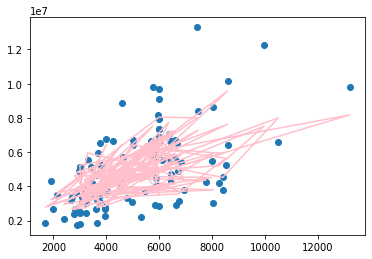

In [66]:
# Multiple Linear Regression
plt.scatter(x_test.area,y_test)
plt.plot(x_test.area,pred_y,color='pink')

# Testing the model performance

In [67]:
# R squared
r2_score(y_test,pred_y)

0.6494754192267804

Text(0.5, 1.0, 'Actual Price V/s Predicted Price')

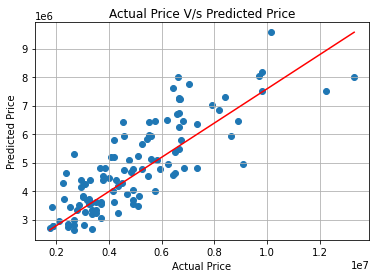

In [68]:
plt.scatter(y_test,pred_y)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid()
plt.plot([min(y_test),max(y_test)],[min(pred_y),max(pred_y)],color='red')
plt.title('Actual Price V/s Predicted Price')